<img align="left" width="25%" style="padding-right:10px;" src="Images/epom.png">


___
# Review of Linear Algebra
## 3 Solution of Linear Equations

Jupyter Notebook Implementation: *Semme J. Dijkstra, 2022*

Based on original Linear Algebra text and in text examples: <br>*David E. Wells, Kresho Frankich, 1994*
___

<a href="https://teams.microsoft.com/l/team/19%3auL2OnH3RSfCWwU2Fd3VYGLT_03BYOfA3KB_OBp10CIY1%40thread.tacv2/conversations?groupId=5c11a428-14b6-429d-b7f5-a61ebc0a440b&tenantId=d6241893-512d-46dc-8d2b-be47e25f5666"><img src="Images/help.png"  title="Ask questions on Teams" align="right" width="10%" alt="Teams.com\"></a> 

Minor additional notes and edits: *Semme J. Dijkstra, 2022*<br>
Additional examples: *Semme J. Dijkstra, 2022*<br>
Python code and explanations: *Semme J. Dijkstra, 2022*<br>
Boat examples: *Semme J. Dijkstra, 2023*
___
___

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, cos
import numpy.linalg as la
from my_code.latex_output import display_matrix
from my_code.boat import boat
# %matplotlib notebook # Can be useful when wanting to manipulate plots
from matplotlib.animation import FuncAnimation
%load_ext autoreload
%autoreload 2

___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

# LaTex<br>

This is a [Jupyter](https://jupyter.org/) notebook in which heavy use of [LaTex](https://www.latex-project.org/) is made. LaTex is *\"a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents.\"* according to [the Latex project](https://www.latex-project.org/)

Latex allows the creation of macros and other type-setting methods of convenience. This particular Markdown cell you are reading is used for the definition of new LaTex operators and commands, but they are hidden from view. If you are interested: double click on this cell to enter its edit mode and you will be able see how they are implemented.

<div hidden>
$\usepackage{amsmath,amssymb}$

$\DeclareRobustCommand{\bbone}{\text{\usefont{U}{bbold}{m}{n}1}}$

$\DeclareMathOperator{\EX}{\mathbb{E}}% expected value$

$\DeclareMathOperator{\res}{\vec{r}}$

$\DeclareMathOperator{\mf}{\mu_{1}\sigma_{2}^{2}+\mu_{2}\sigma_{1}^{2}\over{\sigma_{1}^{2} + \sigma_{2}^{2}}}$
    
$\DeclareMathOperator{\sf}{{\sigma_{1}^{2}\sigma_{2}^{2}}\over{\sigma_{1}^{2}+\sigma_{2}^{2}}}$
    
$\newcommand{\ex}[1]{\mathbb{E}\{#1\}}$
    
$\newcommand{\dev}[1]{\mathbb{E}\{#1^o_i - \mathbb{E}\{#1\}\}}$
    
$\newcommand{\cov}[1]{\mathbb{E}\{(#1^o_i - \mathbb{E}\{#1\})(#1 - \mathbb{E}\{#1\})^T\}}$
    
$\newcommand{\m}[1]{\mathbf{#1}}$

$\newcommand{\col}[2]{\begin{pmatrix}#1 \\ #2 \end{pmatrix}}$
    
</div>

___
# 3. The Solution of Linear Equations

A Set of linear equations in $n$ unknowns $x_i$ can be written explicitly as:

$$a_{11}x_1+a_{12}x_2+\dots+a_{1n}x_n = b_1\tag{88}$$

$$a_{21}x_1+a_{22}x_2+\dots+a_{2n}x_n = b_2\tag{89}$$

$$\vdots$$

$$a_{m1}x_1+a_{m2}x_2+\dots+a_{mn}x_n = b_m\tag{90}$$

where the coefficients $a_{ij}$ and constants $b_j$ are known.

In matrix notation this may be written as:

<a id='eq91'></a>
$$_m\m{A}_n\cdot_n\m{x}_1= _m\m{b}_1\tag{91}$$

or simply:

$$\m{Ax}= \m{b}\tag{91}$$

Where:

$$\m{A} = \begin{pmatrix}a_{11} & a_{12} & \dots & a_{1n}\\a_{21} & a_{22} & \dots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \dots & a_{mn}\end{pmatrix}\tag{92}$$

$$\m{x} = \begin{pmatrix}x_1 \\x_2 \\ \vdots \\x_n\end{pmatrix}\tag{93}$$

$$\m{b} = \begin{pmatrix}b_1 \\b_2 \\ \vdots \\b_n\end{pmatrix}\tag{94}$$

and $\m{A}$ is called the **coefficient matrix**, $\m{x}$ is called the **unknown vector** and $\m{b}$ is called the **constant vector**.

The system is **homogeneous** if the constant vector is zero ($\m{b} = \m{0}$), and **non-homogeneous** if the constant vector is nonzero ($\m{b} \neq \m{0}$).

If we expand the columns of a matrix $\m{A}$ by the columns of a matrix $\m{B}$  we are ***augmenting*** $\m{A}$ with $\m{B}$, which is annotated as $[\m{A|B}]$

The approach we take in solving a system of linear equations such as [(91)](#eq91) depends on the relationships between the rank of coefficient matrix $\m{A}$, the rank of the augmented matrix $[\m{A}|\m{b}]$, and the dimension of the unknown vector $\m{x}$. These are summarized in the following table:

___
<a id='Possible_Linear_Equation_Relationships'></a>
# 3.0 Possible Linear Equation Relationships

$$\begin{array}{|c|c|c|c|} \text{Value of constant vector }\m{b} & \text{Rank of the augmented matrix }[\m{A}|\m{b}]& \text{Rank of  coefficient matrix }\m{A} & \text{Number of solution vectors }\m{x} \\
\hline
\text{Nonhomogeneous}(\m{b} \neq \m{0}) & \text{Inconsistent}(\neq\text{rank}(\m{A})) & \text{ } & \text{None} \\
\text{Nonhomogeneous}(\m{b} \neq \m{0}) & \text{Consistent}(=\text{rank}(\m{A})) & =\text{dim}(\m{x}) & \text{Unique}(\m{x}\neq\m{0}) \\ 
\text{Nonhomogeneous}(\m{b} \neq \m{0}) & \text{Consistent}(=\text{rank}(\m{A})) & <\text{dim}(\m{x}) & \text{Infinite} \\
\text{Homogeneous}(\m{b} = \m{0}) & \text{Consistent}(=\text{rank}(\m{A})) & =\text{dim}(\m{x}) & \text{Unique}(\m{x}=\m{0}) \\
\text{Homogeneous}(\m{b} = \m{0}) & \text{Consistent}(=\text{rank}(\m{A})) & <\text{dim}(\m{x}) & \text{Infinite} \\
\end{array}$$

___
# 3.0.0 Augmenting Matrices using `Numpy`.

In this section we will be using augmented matrices quite a bit. Augmented matrices are formed by combining the columns of two matrices to form a new matrix. In linear systems this results in a matrix with the number of rows matching the number of unknowns, each containing all constants (both from the coefficient matrix and the constant vector) on which then elementary row operations may be performed. `Numpy` offers the `column_stack()` function, which takes as its argument a tuple of the matrices to be augmented e.g.,

    np.column_stack((A, b))
    
augments the matrices `A` and vector `b`. Note that more than one matrix may be augmented (as long as their row dimensions match)

    np.column_stack((A, b1, b2))
    
augments the matrices `A`,`b1` and, `b2`, all with $m$ rows.

___
## 3.1 Inconsistent Systems

If the rank of the coefficient matrix $\m{A}$ is equal to the rank of the augmented matrix $[\m{A}|\m{b}]$ the system is said to be ***consistent***. *Homogeneous* systems are always consistent. If the system is inconsistent there is no solution for $\m{x}$

A simple example of inconsistent equations is:

$$x = 1\tag{95}$$
$$x = 2\tag{96}$$

There is obviously no unique solution for $\m{x}$ that satisfies both these equations. In this case the coefficient and augmented matrices are:

$$\m{A}=\begin{pmatrix}1\\1\end{pmatrix}\tag{97}$$

$$[\m{A}|\m{b}]=\begin{pmatrix}1 & 1\\1 & 2\end{pmatrix}\tag{98}$$

Which have ranks $1$ and $2$ respectively.

Another example of a non-homogeneous system which is inconsistent is:

$$\begin{array}. x_1 &-& 2x_2 &+& x_3 &=& 1\\ 2x_1 &-& 3x_2 &+& 4x_3 &=& 5 \\ 2x_1 &-& 5x_2 &+& &=& 0\end{array}\tag{99}$$

In this case the coefficient $\m{A}$ and augmented $[\m{A}|\m{b}]$ matrices are:

$$\m{A}=\begin{pmatrix}1&-2&1\\2&-3&4\\2&-5&0\end{pmatrix}\tag{100}$$

$$[\m{A}|\m{b}]=\begin{pmatrix}1&-2&1&1\\2&-3&4&5\\2&-5&0&0\end{pmatrix}\tag{101}$$

Which have ranks $2$ and $3$ respectively. Because the ranks are different, this system is inconsistent. In fact, the first two equations can be combined to eliminate $x_3$ to give:

$$\begin{array}. 2x_1&-&5x_2&=&-1\\ 2x_1&-&5x_2&=&0\end{array}\tag{102}$$

which are obviously inconsistent

___
### 3.1 Self Study Exercise 1

Study the table from [3.0 Possible Linear Equation Relationships](#Possible_Linear_Equation_Relationships). Remember that if you have a `numpy` array `A` you get its order as a tuple using the `shape` parameter i.e., `A.shape`

1. Create and display `numpy arrays`: `A`, for the coefficient matrix $\m{A}$, `b` for the constant vector $\m{b}$ and `Ab` for augmented matrix $[\m{A}|\m{b}]$ as defined in the equations of (99)
2. Assign `A_rank` the rank of $\m{A}$, and `Ab_rank` the rank of the augmented matrix $[\m{A}|\m{b}]$
3. Use `if` statements achieve the following
    
    If the system is inconsistent print 'The system represent by $[\m{A}|\m{b}]$  is inconsistent'
    
    If the system has a unique non-null solution for 𝐱 print 'Number of solution vectors 𝐱: one (non-homogeneous: 𝐱≠0)'
    
    If the system has a unique null solution for 𝐱 print 'Number of solution vectors 𝐱: one (homogeneous: 𝐱=0)'
    
    If the system is homogeneous and has a infinite solutions for 𝐱 print 'Homogeneous: number of solution vectors 𝐱: infinite'
    
    If the system is non non=homogeneous and has a infinite solutions for 𝐱 print 'Non-homogeneous: number of solution vectors 𝐱: infinite'
    
4. Manipulate $\m{A}$ and $\m{b}$ in such manner that you get all the possible outcomes of 3.

In [3]:
# 1. Create and display `A`, `b` and, `Ab` for the equations of (99)
A = np.array([[1, -2, 1], [2, -3, 4], [2, -5, 0]])
b = np.array([[1], [5], [0]])
Ab = np.column_stack((A, b))
print('𝐀:')
display_matrix(A)
print('𝐛:')
display_matrix(b)
Ab = np.column_stack((A, b))
print('[𝐀|𝐛]:')
display_matrix(Ab)

# 2. Assign `A_rank` the rank of `A`, and `Ab_rank` the rank of `Ab`
A_rank = la.matrix_rank(A)
Ab_rank = la.matrix_rank(Ab)
print('Matrix 𝐀 has rank %f' % A_rank)
print('Matrix [𝐀|𝐛] has rank %f' % Ab_rank)

# 3. Use `if` statements to represent the outcomes of 3.0
if not Ab_rank == A_rank:
    print('The system represent by [𝐀|𝐛]  is inconsistent')
elif A_rank == A.shape[1]:
    if all(b) == 0:
        print('Number of solution vectors 𝐱: one (homogeneous: 𝐱=0)')
    else:
        print('Number of solution vectors 𝐱: one (non-homogeneous: 𝐱≠0)')
else:
    if all(b) == 0:
        print('Homogeneous: number of solution vectors 𝐱: infinite')
    else:
        print('Non-homogeneous: number of solution vectors 𝐱: infinite')

𝐀:


<IPython.core.display.Math object>

𝐛:


<IPython.core.display.Math object>

[𝐀|𝐛]:


<IPython.core.display.Math object>

Matrix 𝐀 has rank 2.000000
Matrix [𝐀|𝐛] has rank 3.000000
The system represent by [𝐀|𝐛]  is inconsistent


In [4]:
A = np.array([[1, -2, 1], [2, -3, 4], [2, -5, 0]])
b = np.array([[1, 5, 0]])
display_matrix(A)
display_matrix(b)
C = np.row_stack((A,b))
display_matrix(C)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

___
Worked Example (Note that you should try other $\m{A}$ and $\m{b}$ as well):

<img align="left" width="50%" style="padding-left:100px;padding-right:10px" src="Images/sse3_1_1.png">

___
## 3.2 Systems Having a Unique Solution

If the rank of the coefficient matrix is *equal* to the number of unknowns (the number of rows in unknown vector $
\m{x}$) then there is a unique solution. For homogeneous systems this is the trivial solution $\m{x}=\m{0}$. For homogeneous systems having a square coefficient matrix (the number of solutions matches the number of unknowns) this means the coefficient matrix is non-singular ($\text{det}(\m{A})=0$) i.e., its inverse exists. In this special case, the solution is given by:

$$\m{x} = \m{A}^{-1}\m{b}\tag{103}$$

For non-homogeneous systems having rectangular coefficient matrices (more equations than unknowns) the matrix $\m{A}^T\m{A}$ is often non-singular ($\text{det}(\m{A}^T\m{A})\neq0$) and therefore has an inverse. Thus, the solution of:

$$\m{Ax}=\m{b}\tag{104}$$

can be obtained from:

$$\m{A}^T\m{Ax}=\m{A}^T\m{b}\tag{105}$$

resulting in:
<a id='eq105'></a>
$$\m{x}=\left(\m{A}^T\m{A}\right)^{-1}\m{A}^T\m{b}\tag{105}$$

___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

This solution is associated with the parametric method of the least squares in which it is applied to the problem of finding the best *average* solution or *best statistical estimate* (in the least squares sense) from an *inconsistent nonhomogeneous system of equations*. We will address this in great detail in the [Learning Least Squares]() module that is forthcoming.
___




___
## 3.2.1 The Geometry of Systems Having a Unique Solution

Here we will study the geometry of systems having a unique solution as it may be helpful in gaining a deeper insight in the abstract representation of a system that linear algebra represents.

Imagine that we have the system:

$$\begin{array}. x_1 &-& 2x_2 &+& x_3 &=& 1\\ 2x_1 &-& 3x_2 &+& 4x_3 &=& 5 \\ 2x_1 &-& 5x_2 &+&2x_3&=& 1\end{array}\tag{106}$$

The coefficient matrix $\m{A}$ is then:

In [5]:
A = np.array([[1, -2, 1], [2, -3, 4], [2, -5, 2]])
display_matrix(A)
print(' det(𝐀)=%f' % la.det(A))

<IPython.core.display.Math object>

 det(𝐀)=2.000000


and the constant vector $\m{b}$ is:

In [6]:
b = np.array([[1], [5], [1]])
display_matrix(b)

<IPython.core.display.Math object>

We saw that the $\text{det}\left(\m{A}\right)=2$, therefore $\m{A}$ has an inverse. Solving the system gives:
 <a id='eq107'></a>
$$\m{x} = \m{A}^{-1}\m{b}\tag{107}$$

In [7]:
x = la.inv(A)@b
print('𝐱=')
display_matrix(x)

𝐱=


<IPython.core.display.Math object>

Though the math works splendidly it may be hard to envision this. Let us look at another example of 2 equations with 2 unknowns.

$$\begin{array}. 2x_1 &+3x_2&=&6 \\ 4x_1 &+3x_2&=&6\end{array}\tag{108}$$

We may represent this in the form:

$$\begin{array}. x_2&=\dfrac{6-2x_1}{3}\\ x_2&=\dfrac{6-4x_1}{3}\end{array}\tag{109}$$

Which we recognize as two linear equations representing lines. The solution of the system is then found where the lines intersect. We can represent this graphically as well as compute the location using linear algebra.

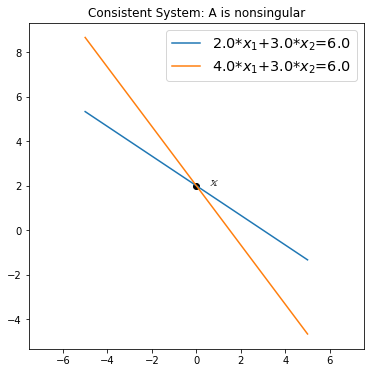

In [8]:
# Define the linear system
A = np.array([[2, 3], [4, 3]])
b = np.array([[6], [6]])
x_1 = np.linspace(-5, 5, 2)


fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

# Calculate the unknown
try:
    x = la.inv(A)@b
    # Plot the unknown
    ax1.plot(x[0], x[1], 'ok')
    ax1.text(x[0], x[1], r'   $\mathbb{x}$', size='x-large')
    plt.title('Consistent System: A is nonsingular')
except np.linalg.LinAlgError as err:
    if 'Singular matrix' in str(err):
        x = np.empty((2, 1))
        plt.title('Inconsistent System: A is singular')
    else:
        raise

for i in range(A.shape[0]):
    x_2 = (b[i]-A[i, 0]*x_1)/A[i, 1]
    ax1.plot(x_1, x_2, label=r"%.1f*$x_1$+%.1f*$x_2$=%.1f" %
             (A[i, 0], A[i, 1], b[i]))

ax1.axis('equal')
ax1.legend(fontsize="x-large")
plt.show()

In the code cell above, you see a graphic illustration of how $\m{A}$ and $\m{b}$ are combined in a set of lines representing the equations. The solution $\m{A}^{-1}\m{b}$ to the unknown $\m{x}$ is then found at the intersection of the lines. It can be seen that the slope of the lines is determined by the coefficients of $\m{A}$ and the intercepts by the elements of the constant vector $\m{b}$ (to see this for yourself manipulate `A` and `b` in the code). 

The code cell above illustrates the simplicity of direct solution of linear equations with explicit inversion, perhaps deceivingly so. Deceiving for two reasons:

1. the complexity of determining the inverse is hidden by calling the `linear algebra.inv()` function.
2. the example used here was chosen to be consistent, non-homogeneous and, with a unique solution. 

We could generalize the code easily, as a matter of fact: in the code above the first steps of generalization are already done by determining the rank of $\m{A}$ and $[\m{A}|\m{b}]$ and, evaluation of $\m{b}$ for the number of solutions.

<a id='3_2_1_Self_Study_Exercise_1'></a>
___
## 3.2.1 Self Study Exercise 1

1. Copy the code block above, in the code cell below
2. Alter A so that the two lines do not intersect
3. Study the try-except code block and ensure that you understand what happens here

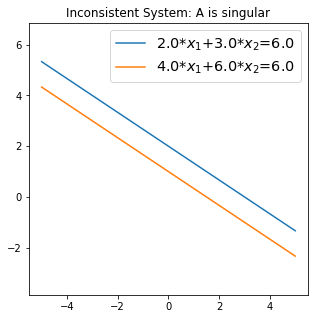

In [9]:
# 1. Copy the code block above, in the code cell below
# 2. Alter A so that the two lines do not intersect
# 3. Study the try-except code block and ensure that you understand what happens here

# Define the linear system
A = np.array([[2, 3], [4, 6]])
b = np.array([[6], [6]])
x_1 = np.linspace(-5, 5, 2)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Calculate the unknown
try:
    x = la.inv(A)@b
    # Plot the unknown
    ax1.plot(x[0], x[1], 'ok')
    ax1.text(x[0], x[1], r'   $\mathbb{x}$', size='x-large')
    plt.title('Consistent System: A is nonsingular')
except np.linalg.LinAlgError as err:
    if 'Singular matrix' in str(err):
        x = np.empty((2, 1))
        plt.title('Inconsistent System: A is singular')
    else:
        raise

for i in range(A.shape[0]):
    x_2 = (b[i]-A[i, 0]*x_1)/A[i, 1]
    ax1.plot(x_1, x_2, label=r"%.1f*$x_1$+%.1f*$x_2$=%.1f" %
             (A[i, 0], A[i, 1], b[i]))

ax1.axis('equal')
ax1.legend(fontsize="x-large")
plt.show()

___
Worked Example (Note that other combinations of $\m{A}$ and $\m{b}$ lead to singular results as well):

<img align="left" width="35%" style="padding-left:100px;padding-right:10px" src="Images/sse3_2_1_1.png">

___
<img align="left" width="50%" style="padding-right:10px;" src="./Images/intersecting_lines.png">
<img align="left" width="50%" style="padding-right:10px;" src="./Images/parallel_lines.png">

The figures above illustrate the difference between the geometry of consistent- (left) and inconsistent (right) systems. If we think of a linear system as a set of lines then they either cross once (unique solution for $\m{x}$), are identical (infinite solutions for $\m{x}$), or do not cross at all (no solution for the unknown $\m{x}$). In the latter case the coefficient matrix will be singular i.e., $\text{det}(\m{A})=0$. If the lines do cross there is a solution, thus $\text{det}(\m{A})\neq 0$. Note that in 2-D space with 2 equations the inverse usually exists unless the equations represent parallel lines. However, in $n$-Dimensional spaces with $n>2$ and $n$-equations it will be the exception for the inverse to exist.

Now imagine that we have the non-homogeneous system with

$$\m{A}=\begin{pmatrix}2&3\\4&3\\8&6\end{pmatrix}\tag{110}$$

and 

$$\m{b}=\begin{pmatrix}6\\6\\12\end{pmatrix}\tag{111}$$

This is represented by the figure below

<img align="left" width="50%" style="padding-right:10px;" src="./Images/2_identical_1_separate.png">

What may be observed from the figure is that though there are three equations; two of them are identical in terms of geometry, resulting in two rather than three lines. In this case we would expect there to be a unique solution for $\m{x}$. However since $\m{A}$ is not a square matrix $\m{x}$ cannot be determined by the matrix product $\m{A}^{-1}\m{b}$  and must be determined from [105](#eq105) i.e., $\m{x}=\left(\m{A}^T\m{A}\right)^{-1}\m{A}^T\m{b}$

In this case $\left(\m{A}^T\m{A}\right)^{-1}\m{A}^T$ is equal to the pseudo-inverse $\m{A}^-$ 

We also must use [105](#eq105) for the case where we have multiple lines that have a common intersection such as the non-homogeneous system with

$$\m{A}=\begin{pmatrix}2&3\\4&3\\8&7\end{pmatrix}\tag{112}$$

and 

$$\m{b}=\begin{pmatrix}6\\6\\14\end{pmatrix}\tag{113}$$

This is represented by the figure below:

<img align="left" width="50%" style="padding-right:10px;" src="./Images/3_lines_common_intersect.png">


In this case the lines are all different, but share a common intersection i.e., a unique solution for $\m{x}$ exists.

In ocean mapping we usually make several observations to determine where we are. We can often represent these observations by straight lines and if we have exactly as many observations as unknowns, we can determine uniquely were we are. However, there is error associated to the observations, so the unique estimate $\m{x}$ will contain some level of error. If we add more observations to improve our results we will run into the issue that there will not be a unique intersection, in this case [105](#eq105) will usually still yield an estimate for $\m{x}$! This result is known as the ***parametric least squares estimator*** $\hat{\m{x}}$. The topic of least squares estimation is extensive and will be addressed in detail in [Learning Least Squares]()



<a id='3_2_1_Self_Study_Exercise_2'></a>
___
## 3.2.1 Self Study Exercise 2

1. Copy the code from [3.2.1 Self Study Exercise 2](#3_2_1_Self_Study_Exercise_1) in the code cell below
2. Update `A` so that it represents the coefficient matrix $\m{A}$ given in (112)
3. Update `b` so that it represents the constant vector $\m{b}$ given in (113)
4. Update the line `x = la.inv(A)@b` so that it implements (105)

In [10]:
A = np.array([[2, 3], [4, 3], [8, 7]])
print(la.pinv(A))
print(la.inv(A.T@A)@A.T)


[[-0.57894737  0.30263158  0.11842105]
 [ 0.68421053 -0.28947368 -0.02631579]]
[[-0.57894737  0.30263158  0.11842105]
 [ 0.68421053 -0.28947368 -0.02631579]]


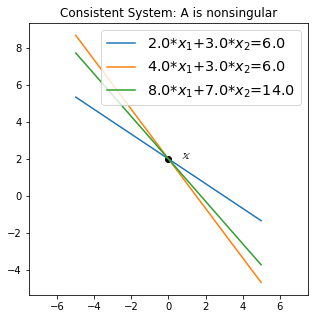

In [11]:
# 1. Copy the code from '3.2.1 Self Study Exercise 2'
# 2. Update `A` so that it represents (112)
# 3. Update `b` so that it represents (113)
# 4. Update the line `x = la.inv(A)@b` so that it implements (105)

# Define the linear system
A = np.array([[2, 3], [4, 3], [8, 7]])
b = np.array([[6], [6], [14]])
x_1 = np.linspace(-5, 5, 2)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Calculate the unknown
try:
    x = la.inv(A.T@A)@A.T@b
    # Plot the unknown
    ax1.plot(x[0], x[1], 'ok')
    ax1.text(x[0], x[1], r'   $\mathbb{x}$', size='x-large')
    plt.title('Consistent System: A is nonsingular')
except np.linalg.LinAlgError as err:
    if 'Singular matrix' in str(err):
        x = np.empty((2, 1))
        plt.title('Inconsistent System: A is singular')
    else:
        raise

for i in range(A.shape[0]):
    x_2 = (b[i]-A[i, 0]*x_1)/A[i, 1]
    ax1.plot(x_1, x_2, label=r"%.1f*$x_1$+%.1f*$x_2$=%.1f" %
             (A[i, 0], A[i, 1], b[i]))

ax1.axis('equal')
ax1.legend(fontsize="x-large")
plt.show()

___
Worked Example:

<img align="left" width="35%" style="padding-left:100px;padding-right:10px" src="Images/sse3_2_1_2.png">

 <a id='Computation_of_Systems_Having_a_Unique_Solution'></a>
 ___
### 3.2.2 Computation of Systems Having a Unique Solution Without Computing an Inverse


At this point some remarks about the relationship between the solution of linear equations and the computation of an inverse are on order:

On the one hand, as noted in [2.3.6 Inverse of a Matrix: Computation](2_Matrix_Algebra.ipynb#Inverse_of_a_Matrix_Computation), the computation of an inverse can be formulated as the problem of solving a non-homogeneous system of linear equations with a unique solution. A specific numerical method for computing the inverse of a symmetric matrix, based on this formulation is the Choleski algorithm.

On the other hand ([107](#eq107)) implies that the solving a non-homogeneous system of linear equations with a unique solution involves the computation of the inverse $\m{A}^{-1}$. In fact, numerical techniques for solving linear equations need not require explicit computation of an inverse. Numerical methods can either be *iterative* or *direct*. Iterative techniques begin with an initial approximation (to the solution) and use a suitable converging process to successively refine this approximation. Iterative techniques are suited to simple implementation on a computer, where they are relatively insensitive to round-off errors. Direct methods yield the exact solution (in the absence of round-off error) in a finite number of elementary arithmetic operations. Direct methods are usually based on the concept of **matrix decomposition** (also known as **matrix factorization**), in which the initial matrix $\m{A}$ is first transformed in the product of two or more other matrices having certain special properties. For example the aforementioned Choleski algorithm first decomposes the initial matrix in the product of a lower triangular matrix $\m{L}$ and its transpose $\m{L}^T$ i.e., $\m{A} = \m{L}\m{L}^T$. 

Direct solution of linear equations without explicit inversion involves three steps:

1. Elimination of some elements of unknown vector $\m{x}$ from the system
2. Solution for the smaller system
3. Back-substitution to solve the eliminated elements of $\m{x}$

Imagine that we have the system:

$$\begin{array}. x_1 &-& 2x_2 &+& x_3 &=& 1\\ 2x_1 &-& 3x_2 &+& 4x_3 &=& 5 \\ 2x_1 &-& 5x_2 &+&2x_3&=& 1\end{array}\tag{114}$$
 
 Applying the three steps, we eliminate $x_1$ by subtracting twice the first equation from the second equation, and by subtracting the third equation from the second equation, to obtain:
 
$$\begin{array}. x_2 &+& 2x_3 &=& 3\\ 2x_2 &+& 2x_3 &=& 4 \end{array}\tag{115}$$
 
To eliminate $x_2$ from these two equations we subtract the second from twice the first row to obtain
 
$$\begin{array}. 2x_3 &=& 2\end{array}\tag{116}$$
  
This completes the elimination step. We now have a triangular system, constructed by taking one of the original three equations (say the first) of (114), one of the two equations (say the first) of (115) and the final equation (116) to obtain: 

$$\begin{array}. x_1 &-& 2x_2 &+& x_3 &=& 1\\   & & x_2 &+& 2x_3 &=& 3 \\   & & & &2x_3&=& 2\end{array}\tag{117}$$

or

$$\begin{pmatrix}1&-2&1 \\ &1 & 2 \\ & & 2\end{pmatrix}\begin{pmatrix}x_1 \\ x_2 \\ x_3\end{pmatrix}=\begin{pmatrix}1 \\ 3 \\ 2\end{pmatrix}\tag{118}$$
  
We solve this system bottom to top. From the first equation $x_3 = 1$. Back substituting this in the value for $x_3$ in the second equation we obtain $x_2 = 1$, back substituting these values for $x_2$ and $x_3$ into the first equation we obtain $x_1=2$. Note that the only explicit matrix inversion here was solving for $x_3$, a scalar division.

$$x=\begin{pmatrix}2\\1\\1\end{pmatrix}$$

The code cell below implements this approach for equations (114)

In [19]:
# Create a coeffcient matrix A and a constant vector b to represent equations 114
A = np.array([[1, -2, 1], [2, -3, 4], [2, -5, 2]])
b = np.array([[1], [5], [1]])

# Create the unknown vector x
x = np.zeros((3, 1))

# Determine the number of linear equations
n = A.shape[0]

# the number of unknows represented by the set of linear equations
# Assign Ab the Augmented matrix [A|b]
Ab = np.column_stack((A, b))
print('Augmented coefficient matrix 𝐀 and coefficient vector 𝐛:')
display_matrix(Ab)

A_rank = la.matrix_rank(A)
Ab_rank = la.matrix_rank(Ab)
print('Matrix 𝐀 has rank %f' % A_rank)
print('Matrix [𝐀|𝐛] has rank %f' % Ab_rank)

# Test the matrices to determine the number of solutions

if not Ab_rank == A_rank:
    print('The system represent by [𝐀|𝐛]  is inconsistent')
    n_solutions = 0
elif A_rank == A.shape[1]:
    n_solutions = 1
    if all(b) == 0:
        print('Number of solution vectors 𝐱: one (homogeneous: 𝐱=0)')
    else:
        print('Number of solution vectors 𝐱: one (non-homogeneous: 𝐱≠0)')
else:
    n_solutions = np.inf
    if all(b) == 0:
        print('Homogeneous: number of solution vectors 𝐱: infinite')
    else:
        print('Non-homogeneous: number of solution vectors 𝐱: infinite')

# Solve the solution if n=1

if n_solutions == 0:
    print('No solution for unknown vector 𝐱')
elif n_solutions == 1:
    # Iteratively transform the augmented matrix Ab to an augmentation of an upper triangular matrix with a 
    # new constant vector through successive variable elimination. 
    # For clarity we will copy Ab to Ub and transform it, but it would be much more efficient to manipulate 
    # Ab directly

    Ub = Ab.copy()   # Step for clarity, but not efficiency
    for i in range(1, n):
        for j in range(i,n):
            Ub[j, :] = Ub[j, :]-Ub[j, i-1]/Ub[i-1, i-1]*Ub[i-1, :]


    # Print Ub, it should now coincide with the augmented matrix for 117
    print('\nTransformed triangular coefficient matrix augmented by the constant vector:')
    display_matrix(Ub)

    # Iteratively back substitute the variables in reverse order
    # Make use of the fact that `x` has been initialized as a Null vector
    for i in reversed(range(0, n)):
        x[i] = (Ub[i, n]-Ub[i, 0:n]@x[0:n])/Ub[i, i]

    # Show the solution found thus
    print('\nUnknown vector  𝐱:')
    display_matrix(x)

else:
    print('System with infinite solutions')

Augmented coefficient matrix 𝐀 and coefficient vector 𝐛:


<IPython.core.display.Math object>

Matrix 𝐀 has rank 3.000000
Matrix [𝐀|𝐛] has rank 3.000000
Number of solution vectors 𝐱: one (non-homogeneous: 𝐱≠0)

Transformed triangular coefficient matrix augmented by the constant vector:


<IPython.core.display.Math object>


Unknown vector  𝐱:


<IPython.core.display.Math object>

 
___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

In least squares approximation and estimation the explicit computation of an inverse matrix is usually desired, because of its relationship to the statistical properties of the solution (the inverse matrix calculated is the covariance matrix of the unknown $\m{x}$ -  we will address this in detail in [Learning Least Squares](). For this reason the least squares solution (such as ([105](#eq105)) is usually determined by explicit inversion of, in this case, $\left(\m{A}^T\m{A}\right)^{-1}$. However, for systems of equations large enough to strain the storage capacity of the computer being used, an elimination process similar to the one illustrated above is more practical than explicit inversion. In this case the matrix inversion required for determining the covariance matrix (or at least parts of its inverse) can be determined afterwards.

<a id='3_2_2_Self_Study_Exercise_1'></a>
___
## 3.2.2 Self Study Exercise 1

The code in the cell above contains the lines

    for i in range(1,n):
        Ub[i:n,:]=Ub[i:n,:]-Ub[i,i-1]/Ub[i-1,i-1]*Ub[i-1,:]
        
1. Explain how this successively eliminates the variables $x_1$, $x_2$ and, $x_3$, (represented by `x[0]`, `x[1]` and, `x[2]` respectively).
   
The code cell also contains the lines

    for i in reversed(range(0,n)):
        x[i]=(U[i,n]-U[i,0:n]@x[0:n])/U[i,i]
        
2. Explain why, for this code to work, it is essential that the array `x` is initialized with zeros

3. Can you think of another way of achieving the same effect in which it does not matter with what values `x` is initiated?

In [13]:
q_3_2_2_1_1 = 'First the 1st expression is scaled subtracted from the 2nd through nth equations so as '
q_3_2_2_1_1 += 'the eliminate the first column coefficient from them. Then the 2nd equation is scaled and subtracted'
q_3_2_2_1_1 += 'from the 3d through n-th equation to eliminate the 2nd column coefficient from them. This is iterated'
q_3_2_2_1_1 += 'until all bit the last column elements are zero'

q_3_2_2_1_2 = 'Since this code contains the matrix product U[i,0:n]@x[0:n] to determine x[i] and x[i] is part of x[0:n] it'
q_3_2_2_1_2 += 'must be initiated to zero to not affect the outcome'

q_3_2_2_1_3 = 'For example, You could create a boolean index vector that has all values in [0:n] set to True, with the'
q_3_2_2_1_3 += 'exception of the element at index i, which is set to False'

<a id='Computation_of_Systems_Having_a_Unique_Solution'></a>
 ___
### 3.2.3 Computation of Systems Having Infinite Number of Solutions

If the rank of the coefficient matrix $\m{A}$ is less than the number of unknowns (dimension of $\m{x}$) then  there will be an infinite number of solutions for both homogeneous and non-homogeneous systems. If there are $n$-unknowns and the rank of $\m{A}$ is $r$ then $(n-r)$ of the unknowns may be chosen so that the coefficient of the matrix of the remaining $r$ unknowns is of rank $r$. When these $(n-r)$ unknowns are assigned arbitrary values, the remaining $r$ unknowns will be uniquely determined. Generalized inverses can be used for the solution of such systems.

An example of a non-homogeneous system having an infinite number of solutions is:

$$\begin{array}. 1x_1 &-&2x_2&+&x_3&=&1 \\ 2x_1 &-&3x_2&+&4x_3&=&5 \\ 2x_1 &-&5x_2& & &=&-1\end{array}\tag{119}$$

The coefficient matrix $\m{A}$ is then:

$$A = \begin{pmatrix} 1 & -2 & 1 \\ 2 & -3 & 4 \\ 2 &-5&0\end{pmatrix}\tag{120}$$

and has rank $2$. By assigning one of the unknowns (in this case $x_3$) an arbitrary value, the other two unknowns are uniquely determined. In fact the equations can be combined to give:

$$\begin{array}. x_1&=&7&-&5x_3 \\  x_2&=&3&-&2x_3\end{array}\tag{121}$$

<a id='Application_to_Least_Squares_Adjustment'></a>
 ___
### 3.2.4 Application to Least Squares Adjustment

If you are already familiar with the parametric Method of the Least Squares this may be of interest to you, if not: move on to [4 Linear Transformations](4_Linear_Transformations.ipynb)

In a parametric least squares estimation we have a set of **observation equations** modeling the observed values. For a proper experiment there should be more equations than unknowns i.e., more observations than unknowns. Due to observation errors these equations will be inconsistent. Therefore rather than attempting a direct solution of these solutions we apply the least squares criterion and formulate the **normal equations**:

$$\m{Nx}=\m{u}\tag{122}$$

In most cases the normal matrix equation $\m{N}$ is square, symmetric, positive definite (see [4 Linear Transformations](4_Linear_Transformations.ipynb)), non-singular, and with dimension and rank equivalent to the dimension of the unknown vector $\m{x}$. We therefore have a non-homogeneous, consistent system of normal equations with a unique solution given by:

$$\m{x}=\m{N}^{-1}\m{u}\tag{123}$$

In which we make use of the special symmetry and positive definite properties of $\m{N}$ to simplify its calculation.

___
### Useful Resources

[Learning Least Squares]()

[Gilbert Strang MIT video lecture series](https://ocw.mit.edu/courses/18-06-linear-algebra-spring-2010/video_galleries/video-lectures/)

___
## Jump to Chapter

[1: Introduction](1_Introduction.ipynb)<br>
[2: Matrix Algebra.ipynb](2_Matrix_Algebra.ipynb)<br>
[4: Linear Transformations](4_Linear_Transformations.ipynb)<br>
[5: Solution of Nonlinear Equations](5_Solution_of_Nonlinear_Equations.ipynb)<br>
[6: The Choleski Method](6_The_Choleski_Method.ipynb) <br>

___
#### Copyright 2022, Semme J. Dijkstra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.